In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

url = 'https://raw.githubusercontent.com/marcanthonny/binusmarkeu/refs/heads/main/LC41.csv'
url2 = 'https://raw.githubusercontent.com/marcanthonny/binusmarkeu/refs/heads/main/LB41.csv'
url3 = 'https://raw.githubusercontent.com/marcanthonny/binusmarkeu/refs/heads/main/LA41.csv'

datalc41 = pd.read_csv(url, on_bad_lines='skip')
datalb41 = pd.read_csv(url2, on_bad_lines='skip')
datala41 = pd.read_csv(url3, on_bad_lines='skip')

datalc41.head()

,Final Profit,Delivered Percentage,Average Stock,Throughout Time,OTIF Percentage,Quality Performance,Flow Efficiency,Resource Efficiency
0,$-872,50%,28.6,06:22.6,0%,88%,8%,54%
1,$-104,50%,22.2,04:22.3,10%,97%,11%,52%
2,$892,70%,20.5,03:51.2,40%,99%,10%,45%
3,$-346,40%,23.4,"05:14,9",20%,91%,11%,49%
4,$492,80%,16.3,03:07.5,38%,78%,15%,57%


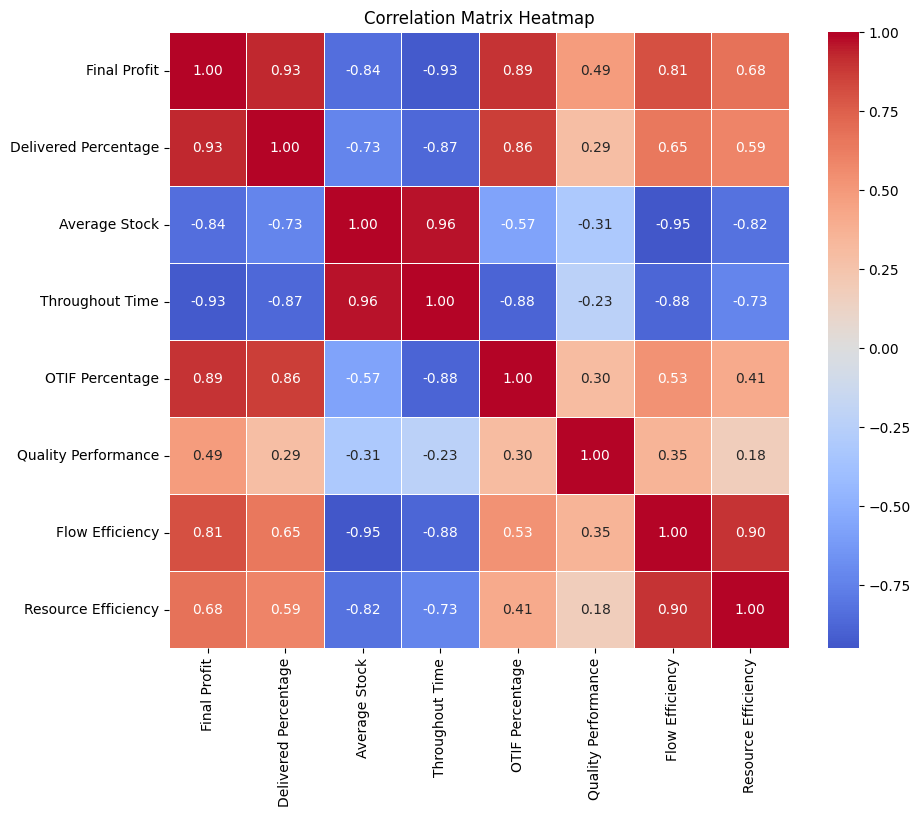

In [10]:
# Sample data loading (replace this with your actual data loading code)
# datalc41 = pd.read_csv('path_to_your_file.csv')

# Clean up columns and convert to numeric where necessary
datalc41['Final Profit'] = datalc41['Final Profit'].replace('[\$,]', '', regex=True).astype(float)
datalc41['Delivered Percentage'] = datalc41['Delivered Percentage'].replace('%', '', regex=True).astype(float)
datalc41['OTIF Percentage'] = datalc41['OTIF Percentage'].replace('%', '', regex=True).astype(float)
datalc41['Quality Performance'] = datalc41['Quality Performance'].replace('%', '', regex=True).astype(float)
datalc41['Flow Efficiency'] = datalc41['Flow Efficiency'].replace('%', '', regex=True).astype(float)
datalc41['Resource Efficiency'] = datalc41['Resource Efficiency'].replace('%', '', regex=True).astype(float)

# Define a function to convert custom time format to minutes
def convert_to_minutes(time_str):
    match = re.match(r'(\d+):(\d+)\.(\d+)', time_str)
    if match:
        hours = int(match.group(1))
        minutes = int(match.group(2))
        seconds = int(match.group(3))
        total_minutes = hours * 60 + minutes + seconds / 60
        return total_minutes
    else:
        return None  # Return None if the format doesn't match

# Apply the function to Throughout Time column
datalc41['Throughout Time'] = datalc41['Throughout Time'].apply(convert_to_minutes)

# Check for any None values after conversion and handle them if needed
if datalc41['Throughout Time'].isnull().any():
    print("Warning: Some entries couldn't be converted. Please check the format of Throughout Time column.")

# Proceed with calculating the correlation matrix
correlation_matrix = datalc41.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()